In [2]:
import pandas as pd
import seaborn as sns
import random
import math
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('SalariesSimple.csv')
print(df)

      total_experience_years  annual_base_pay
0                       13.0         125000.0
1                       15.0          65000.0
2                        4.0          86000.0
3                        4.0         105000.0
4                        4.0         110000.0
...                      ...              ...
1650                     1.0          60500.0
1651                     6.0         164000.0
1652                     7.0         150000.0
1653                     5.0          75000.0
1654                     2.0             50.0

[1655 rows x 2 columns]


In [4]:
df.dropna(axis=0, inplace=True)
df = df[(df['annual_base_pay'] >15000) & (df['total_experience_years']>0)]
df = df[(df['total_experience_years'] < 30)]
df.drop(df[df['annual_base_pay']>= 200000].index, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1374 entries, 0 to 1653
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_experience_years  1374 non-null   float64
 1   annual_base_pay         1374 non-null   float64
dtypes: float64(2)
memory usage: 32.2 KB


In [6]:
df.describe()

,total_experience_years,annual_base_pay
count,1374.000000,1374.000000
mean,6.709483,97196.241063
std,4.885827,40736.641199
min,0.500000,16543.000000
25%,3.000000,65000.000000
50%,5.000000,99750.000000
75%,10.000000,126750.000000
max,26.000000,198000.000000


<Axes: xlabel='total_experience_years', ylabel='annual_base_pay'>

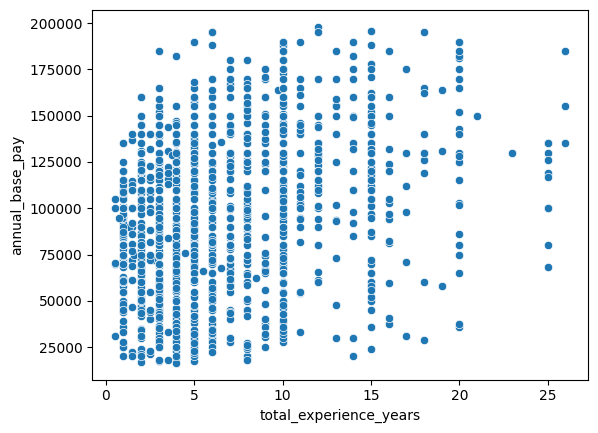

In [7]:
sns.scatterplot(data=df, x='total_experience_years', y="annual_base_pay")

In [8]:
df = df[(df['annual_base_pay'] >15000) & (df['total_experience_years']>0)]
print(df['annual_base_pay'].max())

198000.0


In [9]:
def testTrainSplit(data):
    length = len(df.index)
    splitLimit = int(length * 0.7)
    train = data[0: splitLimit]
    test = data[splitLimit + 1: length]
    return train, test

In [10]:
train, test = testTrainSplit(df)

In [11]:
def sumOfDistances(a, b, c, trainDF):
    sum = 0
    for row in range(0, len(trainDF.index)):
        exp = trainDF.iat[row, 0]
        pay = trainDF.iat[row, 1]
        distance = abs((a*exp) + (b*pay) + c) / math.sqrt((a*a) + (b*b))
        sum = sum + distance
    return sum

In [12]:
def trainLinearRegression(trainDF):
    count = 0
    slopes = {}
    while count < 1000:
        a = random.randint(15000, 20000) # Slope!
        b = -1 # Coefficient to y --> by = ax + c --> negative because we move to other side
        c = 900 # Y-intercept
        count = count + 1
        sum = sumOfDistances(a, b, c, train)
        slopes[a] = sum
    return slopes

In [13]:
trainSlopes = trainLinearRegression(train)
print(trainSlopes)

{17969: 3324.816217234389, 19125: 3343.178811639042, 19524: 3354.2558775916423, 16162: 3360.303456010593, 17536: 3325.3126679508514, 16676: 3340.695474924156, 19316: 3348.1334434320042, 15398: 3403.4150077597856, 17428: 3326.014734024467, 16690: 3340.273158773631, 19178: 3344.5325285641347, 19747: 3360.828643080105, 16859: 3335.680431880372, 19086: 3342.177878677788, 19855: 3364.0610110946536, 17602: 3324.9008218130566, 19702: 3359.5034674013814, 16722: 3339.314894160505, 15717: 3383.2242827747427, 16335: 3352.9329303562718, 16771: 3337.9206153768578, 16683: 3340.483269189209, 16292: 3354.7366840807445, 15091: 3426.1533792646983, 19824: 3363.1059198535045, 17613: 3324.839066917283, 16159: 3360.438015720002, 16767: 3338.027229704679, 16067: 3364.7372910493805, 15640: 3387.73676545373, 18762: 3334.1641888469167, 18754: 3333.998312419338, 18284: 3327.014709528456, 18219: 3326.415588600381, 18904: 3337.464946663453, 18758: 3334.081268319066, 17150: 3329.8421704326574, 15418: 3402.056010485

In [14]:
temp = min(trainSlopes.values())
res = [key for key in trainSlopes if trainSlopes[key] == temp]
 
print("slope: " + str(res[0]))
print("distace: " + str(temp))

slope: 17825
distace: 3324.293505007123


In [15]:
a = 17807
b = -1
c = 900
prediction = []
#ax +by = c
for row in range(0, len(test.index)):
    exp = test.iat[row, 0]
    prediction.append((c - (a * exp))/ b)
print(prediction)

[105942.0, 27591.2, 123749.0, 16907.0, 70328.0, 52521.0, 141556.0, 16907.0, 25810.5, 194977.0, 177170.0, 123749.0, 34714.0, 34714.0, 141556.0, 70328.0, 266205.0, 34714.0, 52521.0, 266205.0, 159363.0, 52521.0, 34714.0, 52521.0, 266205.0, 177170.0, 43617.5, 141556.0, 88135.0, 177170.0, 25810.5, 34714.0, 34714.0, 52521.0, 52521.0, 319626.0, 355240.0, 34714.0, 105942.0, 88135.0, 70328.0, 248398.0, 8003.5, 444275.0, 52521.0, 43617.5, 70328.0, 88135.0, 70328.0, 212784.0, 177170.0, 70328.0, 34714.0, 177170.0, 16907.0, 52521.0, 16907.0, 16907.0, 25810.5, 194977.0, 177170.0, 177170.0, 266205.0, 177170.0, 52521.0, 159363.0, 88135.0, 105942.0, 177170.0, 88135.0, 88135.0, 105942.0, 212784.0, 34714.0, 34714.0, 34714.0, 105942.0, 52521.0, 34714.0, 25810.5, 177170.0, 177170.0, 52521.0, 355240.0, 52521.0, 34714.0, 43617.5, 141556.0, 70328.0, 141556.0, 105942.0, 88135.0, 34714.0, 52521.0, 70328.0, 88135.0, 52521.0, 70328.0, 52521.0, 70328.0, 337433.0, 88135.0, 105942.0, 25810.5, 34714.0, 123749.0, 6142

In [16]:
actual = [row for row in test.iloc[:, 1]]
print(actual)

[45000.0, 74500.0, 145000.0, 62000.0, 120000.0, 150000.0, 153000.0, 58000.0, 112500.0, 130000.0, 120000.0, 72485.0, 44000.0, 44000.0, 156800.0, 75000.0, 58000.0, 130000.0, 105000.0, 150000.0, 171000.0, 48500.0, 75000.0, 125000.0, 125000.0, 165000.0, 117000.0, 72000.0, 119000.0, 120000.0, 22310.0, 61000.0, 120000.0, 120000.0, 120000.0, 140000.0, 80000.0, 65000.0, 70000.0, 40000.0, 135000.0, 120000.0, 100000.0, 135000.0, 130000.0, 123000.0, 103000.0, 77000.0, 69000.0, 101000.0, 106000.0, 100000.0, 120500.0, 140000.0, 114500.0, 70000.0, 112500.0, 100000.0, 110000.0, 155000.0, 190000.0, 160000.0, 132000.0, 125000.0, 97000.0, 30500.0, 159500.0, 160000.0, 141000.0, 190000.0, 130000.0, 90000.0, 115000.0, 57516.0, 75000.0, 64000.0, 140000.0, 18000.0, 100000.0, 77000.0, 128000.0, 150000.0, 126000.0, 175000.0, 65000.0, 92000.0, 21027.0, 140000.0, 110000.0, 130000.0, 155000.0, 135000.0, 140000.0, 110000.0, 50000.0, 95000.0, 58000.0, 66000.0, 89000.0, 128000.0, 164000.0, 32000.0, 40000.0, 110000.0

In [17]:
for i in range(len(test)):
    mse = ((actual[i] - prediction[i])**2)/len(train)
print(mse)

179529.89073881373


In [18]:
prediction24 = ((c - (a * 24))/ b)
print(prediction24)

426468.0


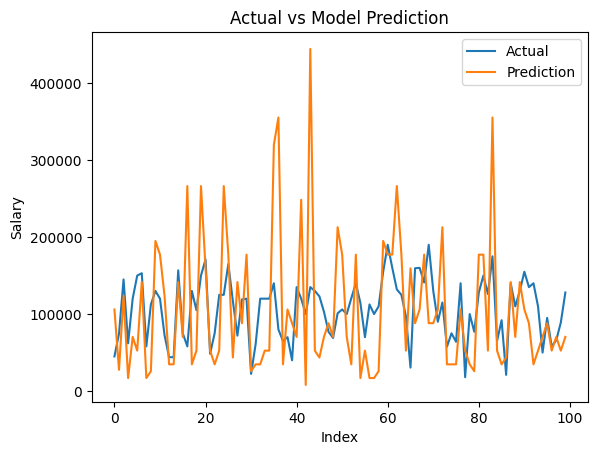

In [19]:
plt.plot([x for x in range(100)], actual[:100], label='Actual')
plt.plot([x for x in range(100)], prediction[:100], label='Prediction')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.title('Actual vs Model Prediction')

plt.legend()
plt.show()